# STAT306 Final Group 19

# Data Description

In [1]:
# Library Imports
library(tidyverse)
library(corrplot)
library(ggplot2)
library(car)
library(GGally)
library(rsample)
library(caret)


#if needed
#install.packages("corrplot", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("rsample", dependencies = TRUE, repos = "https://cloud.r-project.org/")

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘packa

In [2]:
gym_membership_data <- read_csv("gym_members_exercise_tracking.csv")
head(gym_membership_data)

Rows: 973 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Gender, Workout_Type
dbl (13): Age, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Sessi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age Gender Weight (kg) Height (m) Max_BPM Avg_BPM Resting_BPM
1 56  Male   88.3        1.71       180     157     60         
2 46  Female 74.9        1.53       179     151     66         
3 32  Female 68.1        1.66       167     122     54         
4 25  Male   53.2        1.70       190     164     56         
5 38  Male   46.1        1.79       188     158     68         
6 56  Female 58.0        1.68       168     156     74         
  Session_Duration (hours) Calories_Burned Workout_Type Fat_Percentage
1 1.69                     1313            Yoga         12.6          
2 1.30                      883            HIIT         33.9          
3 1.11                      677            Cardio       33.4          
4 0.59                      532            Strength     28.8          
5 0.64                      556            Strength     29.2          
6 1.59                     1116            HIIT         15.5          
  Water_Intake (liters) Workout_Frequency (days/week) Experience_Level BMI  
1 3.5                   4                             3                30.20
2 2.1                   4                             2                32.00
3 2.3                   4                             2                24.71
4 2.1                   3                             1                18.41
5 2.8                   3                             1                14.39
6 2.7                   5                             3                20.55

In [3]:
num_cols <- ncol(gym_membership_data)
cat("This dataset has", num_cols ,"variables.")

This dataset has 15 variables.

In [4]:
n <- nrow(gym_membership_data)
cat("This dataset has", n ,"observations.")

This dataset has 973 observations.

| Variable | Description |
|----------|-------------|
| `Age` | Age of the gym member (years) |
| `Gender` | Gender of the gym member (Male or Female) |
| `Weight` | Member’s weight in kilograms (kg) |
| `Height` | Member’s height in meters (m) |
| `Max_BPM` | Maximum heart rate during workout sessions (beats per minute) |
| `Avg_BPM` | Average heart rate during workout sessions (beats per minute) |
| `Resting_BPM` | Heart rate at rest before workout (beats per minute) |
| `Session_Duration` | Duration of each workout session (hours) |
| `Calories_Burned` | Total calories burned during each session |
| `Workout_Type` | Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT) |
| `Fat_Percentage` | Body fat percentage of the member (%) |
| `Water_Intake` | Daily water intake during workouts (liters) |
| `Workout_Frequency` | Number of workout sessions per week (days/week) |
| `Experience_Level` | Level of experience, from beginner (1) to expert (3) |
| `BMI` | Body Mass Index (Weight in kg / (Height in m)^2) |

# Questions for Investigation

## Insert text here


# Exploratory Data Analysis (EDA)

In [5]:
head(gym_membership_data, 10)

Age Gender Weight (kg) Height (m) Max_BPM Avg_BPM Resting_BPM
1  56  Male    88.3       1.71       180     157     60         
2  46  Female  74.9       1.53       179     151     66         
3  32  Female  68.1       1.66       167     122     54         
4  25  Male    53.2       1.70       190     164     56         
5  38  Male    46.1       1.79       188     158     68         
6  56  Female  58.0       1.68       168     156     74         
7  36  Male    70.3       1.72       174     169     73         
8  40  Female  69.7       1.51       189     141     64         
9  28  Male   121.7       1.94       185     127     52         
10 28  Male   101.8       1.84       169     136     64         
   Session_Duration (hours) Calories_Burned Workout_Type Fat_Percentage
1  1.69                     1313            Yoga         12.6          
2  1.30                      883            HIIT         33.9          
3  1.11                      677            Cardio       33.4          
4  0.59                      532            Strength     28.8          
5  0.64                      556            Strength     29.2          
6  1.59                     1116            HIIT         15.5          
7  1.49                     1385            Cardio       21.3          
8  1.27                      895            Cardio       30.6          
9  1.03                      719            Strength     28.9          
10 1.08                      808            Cardio       29.7          
   Water_Intake (liters) Workout_Frequency (days/week) Experience_Level BMI  
1  3.5                   4                             3                30.20
2  2.1                   4                             2                32.00
3  2.3                   4                             2                24.71
4  2.1                   3                             1                18.41
5  2.8                   3                             1                14.39
6  2.7                   5                             3                20.55
7  2.3                   3                             2                23.76
8  1.9                   3                             2                30.57
9  2.6                   4                             2                32.34
10 2.7                   3                             1                30.07

In [3]:
gym_membership_data <- gym_membership_data %>%
  mutate(Gender = as.factor(Gender),
         Workout_Type = as.factor(Workout_Type),
         Experience_Level = as.factor(Experience_Level))

In [4]:
# check for NA
colSums(is.na(gym_membership_data))

Age                        Gender 
                            0                             0 
                  Weight (kg)                    Height (m) 
                            0                             0 
                      Max_BPM                       Avg_BPM 
                            0                             0 
                  Resting_BPM      Session_Duration (hours) 
                            0                             0 
              Calories_Burned                  Workout_Type 
                            0                             0 
               Fat_Percentage         Water_Intake (liters) 
                            0                             0 
Workout_Frequency (days/week)              Experience_Level 
                            0                             0 
                          BMI 
                            0

In [5]:
names(gym_membership_data) <- make.names(names(gym_membership_data))
colnames(gym_membership_data)

[1] "Age"                           "Gender"                       
 [3] "Weight..kg."                   "Height..m."                   
 [5] "Max_BPM"                       "Avg_BPM"                      
 [7] "Resting_BPM"                   "Session_Duration..hours."     
 [9] "Calories_Burned"               "Workout_Type"                 
[11] "Fat_Percentage"                "Water_Intake..liters."        
[13] "Workout_Frequency..days.week." "Experience_Level"             
[15] "BMI"

## Data Visualization

In [6]:
# gym_membership_pair_plots <- 
#     gym_membership_data %>%
#     ggpairs(progress = FALSE) +
#     ggtitle("Pairwise Plots of All Variables") +
#     theme(
#         plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
#         text = element_text(size = 10),
#         axis.title = element_text(face = "bold")
#     ) 

# gym_membership_pair_plots

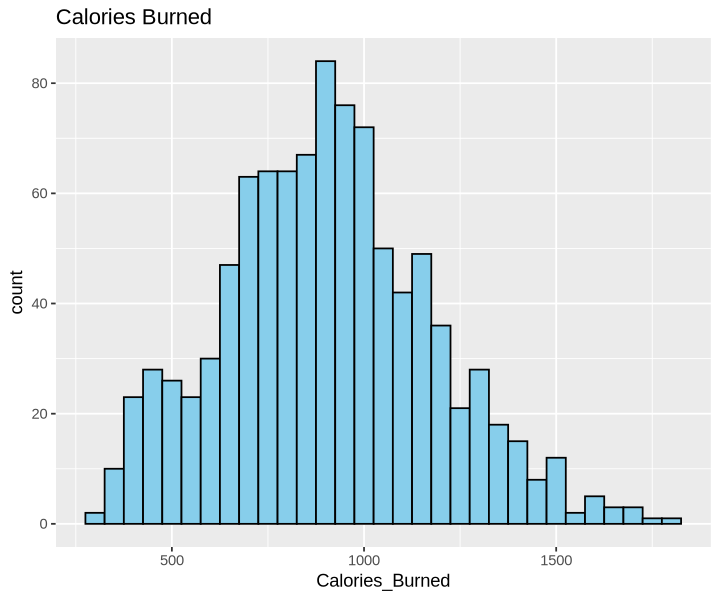

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


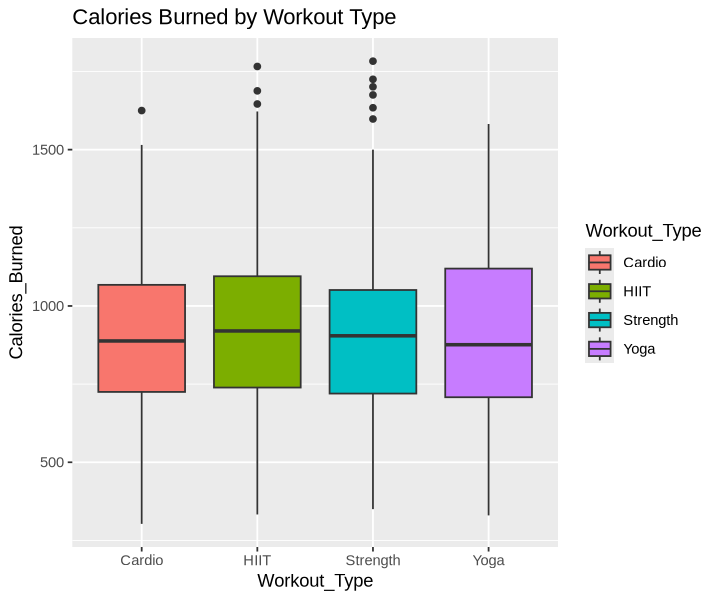

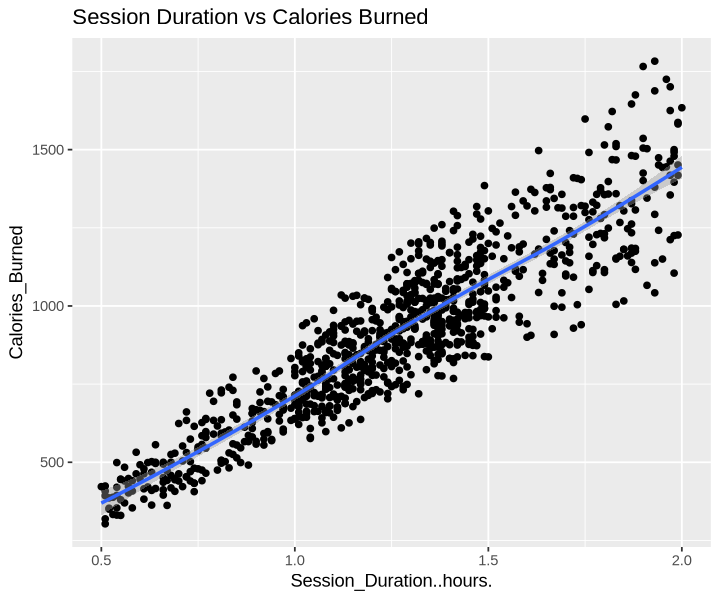

`geom_smooth()` using formula = 'y ~ x'


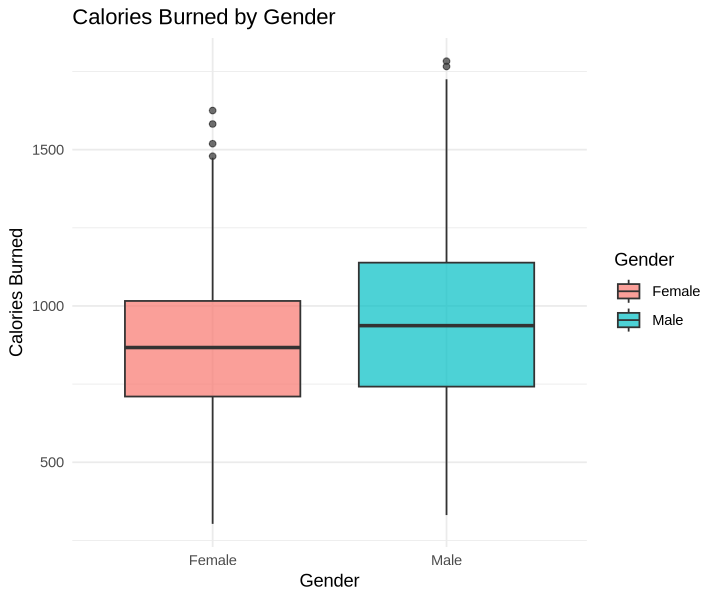

`geom_smooth()` using formula = 'y ~ x'


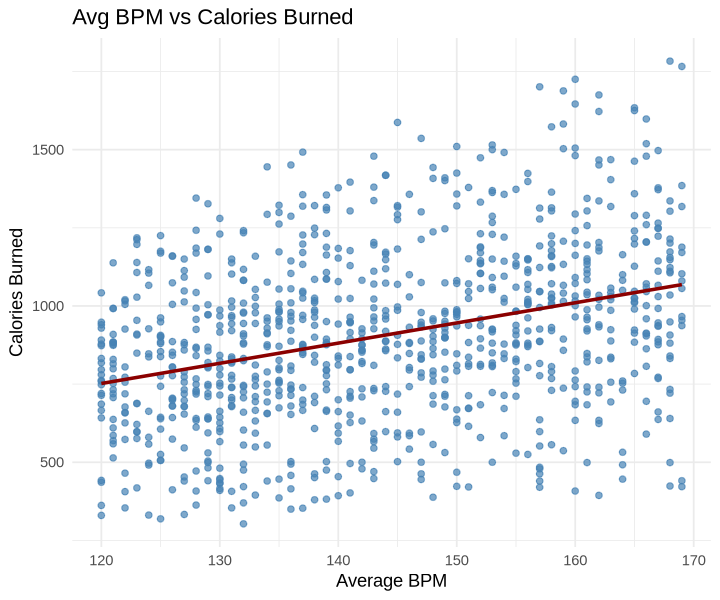

`geom_smooth()` using formula = 'y ~ x'


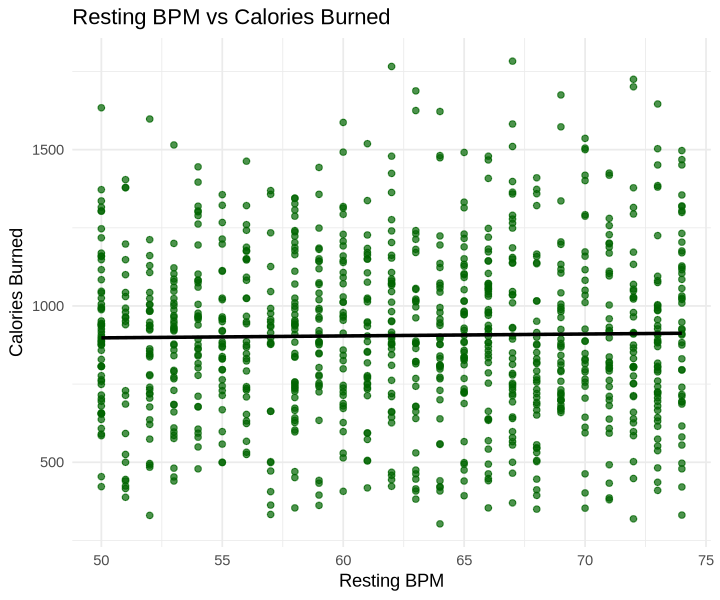

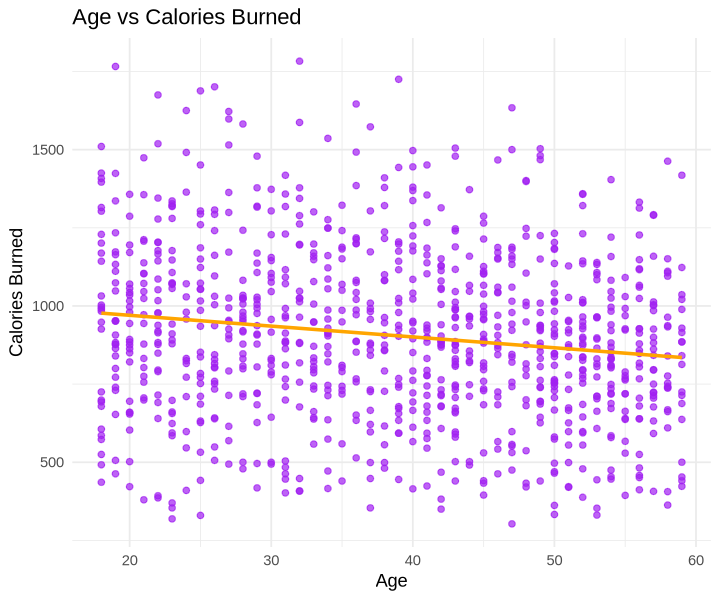

In [7]:
options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(gym_membership_data, aes(x = Calories_Burned)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Calories Burned")

ggplot(gym_membership_data, aes(x = Workout_Type, y = Calories_Burned, fill = Workout_Type)) +
  geom_boxplot() +
  labs(title = "Calories Burned by Workout Type")

ggplot(gym_membership_data, aes(x = Session_Duration..hours., y = Calories_Burned)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Session Duration vs Calories Burned")

ggplot(gym_membership_data, aes(x = Gender, y = Calories_Burned, fill = Gender)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Calories Burned by Gender", x = "Gender", y = "Calories Burned") +
  theme_minimal()
ggplot(gym_membership_data, aes(x = Avg_BPM, y = Calories_Burned)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_smooth(method = "lm", color = "darkred", se = FALSE) +
  labs(title = "Avg BPM vs Calories Burned", x = "Average BPM", y = "Calories Burned") +
  theme_minimal()
ggplot(gym_membership_data, aes(x = Resting_BPM, y = Calories_Burned)) +
  geom_point(color = "darkgreen", alpha = 0.7) +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  labs(title = "Resting BPM vs Calories Burned", x = "Resting BPM", y = "Calories Burned") +
  theme_minimal()

ggplot(gym_membership_data, aes(x = Age, y = Calories_Burned)) +
  geom_point(color = "purple", alpha = 0.7) +
  geom_smooth(method = "lm", color = "orange", se = FALSE) +
  labs(title = "Age vs Calories Burned", x = "Age", y = "Calories Burned") +
  theme_minimal()

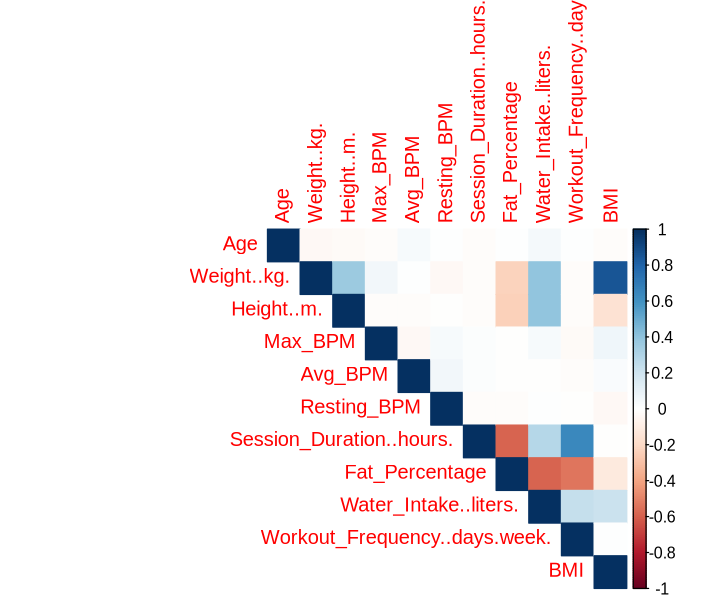

In [9]:
# Correlation matrix for numeric variables
options(repr.plot.width = 6, repr.plot.height = 5)
num_vars <- gym_membership_data %>% 
    select(where(is.numeric)) %>% 
    select(-Calories_Burned)
corrplot(cor(num_vars), method = "color", type = "upper")

# Base model + motivation for feature selection

In [9]:
split <- initial_split(gym_membership_data, prop = 0.7)
gym_membership_train <- training(split)
gym_membership_test <- testing(split)

In [9]:
base_model <- lm(Calories_Burned ~ ., data = gym_membership_train)
summary(base_model)


Call:
lm(formula = Calories_Burned ~ ., data = gym_membership_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-126.75  -23.87   -2.05   22.03  168.80 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.068e+03  1.047e+02 -10.192   <2e-16 ***
Age                           -3.361e+00  1.242e-01 -27.066   <2e-16 ***
GenderMale                     7.748e+01  6.193e+00  12.511   <2e-16 ***
Weight..kg.                   -1.243e+00  6.246e-01  -1.990   0.0470 *  
Height..m.                     1.330e+02  5.711e+01   2.329   0.0202 *  
Max_BPM                        7.861e-02  1.320e-01   0.596   0.5516    
Avg_BPM                        6.181e+00  1.058e-01  58.447   <2e-16 ***
Resting_BPM                    4.145e-01  2.116e-01   1.959   0.0505 .  
Session_Duration..hours.       7.173e+02  7.191e+00  99.750   <2e-16 ***
Workout_TypeHIIT               1.991e+00  4.389e+00   0.454   0.6502    
Workout_TypeStreng

In [ ]:
par(mfrow = c(2, 2))
plot(base_model)
par(mfrow = c(1,1))

In [1]:
vif(base_model)

ERROR: Error in vif(base_model): could not find function "vif"


In [16]:
null_model <- lm(Calories_Burned ~ 1, data = gym_membership_train)

full_model <- lm(Calories_Burned ~ ., data = gym_membership_train)

forward_model <- step(null_model, 
                      scope = formula(full_model), 
                      direction = "forward")
forward_model

Start:  AIC=7631.27
Calories_Burned ~ 1

                                Df Sum of Sq      RSS    AIC
+ Session_Duration..hours.       1  41295717  8657942 6439.7
+ Experience_Level               2  26416339 23537320 7122.8
+ Workout_Frequency..days.week.  1  17730749 32222910 7334.7
+ Fat_Percentage                 1  17466278 32487381 7340.3
+ Water_Intake..liters.          1   5466500 44487159 7554.3
+ Avg_BPM                        1   5117287 44836372 7559.7
+ Age                            1   1220759 48732900 7616.4
+ Gender                         1   1212051 48741608 7616.5
+ Weight..kg.                    1    416258 49537401 7627.6
+ BMI                            1    310154 49643505 7629.0
<none>                                       49953659 7631.3
+ Height..m.                     1     89168 49864491 7632.1
+ Resting_BPM                    1     43945 49909714 7632.7
+ Max_BPM                        1        38 49953621 7633.3
+ Workout_Type                   3    233914


Call:
lm(formula = Calories_Burned ~ Session_Duration..hours. + Avg_BPM + 
    Gender + Age + Resting_BPM + BMI, data = gym_membership_train)

Coefficients:
             (Intercept)  Session_Duration..hours.                   Avg_BPM  
               -847.1913                  709.9068                    6.2618  
              GenderMale                       Age               Resting_BPM  
                 87.5136                   -3.3521                    0.4784  
                     BMI  
                  0.5412  


In [10]:
cv_control <- trainControl(method = "cv", number = 5)

In [11]:
library(caret)

cv_control <- trainControl(method = "cv", number = 5)

model_1 <- train(Calories_Burned ~ Session_Duration..hours., 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_2 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_3 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_4 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_5 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)
extended_model <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + 
                    Age + Resting_BPM + Workout_Type, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_6 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_7 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage + BMI, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)



Call:
summary.resamples(object = results)

Models: Model1, Model2, Model3, Model4, Model5, Model6, Model7, Extended 
Number of resamples: 5 

MAE 
             Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Model1   77.06267 87.56084 90.10871 88.32450 92.34228 94.54799    0
Model2   46.10815 50.02244 54.66391 54.55956 59.54900 62.45430    0
Model3   46.91500 49.35792 51.06838 50.88161 51.58545 55.48129    0
Model4   29.56412 29.87761 30.07245 30.17701 30.44202 30.92884    0
Model5   26.58716 29.07735 29.58407 30.43150 33.31953 33.58938    0
Model6   25.97003 30.35822 30.77580 30.13382 30.81043 32.75460    0
Model7   28.23482 28.26506 30.10206 30.18682 32.05971 32.27244    0
Extended 26.74174 29.19817 30.36649 30.28039 31.73614 33.35941    0

RMSE 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Model1   101.95332 109.75510 112.05810 113.24320 119.72596 122.72350    0
Model2    59.66069  68.49946  70.16816  71.62330  77.45950  82.32869    0
Model3    5

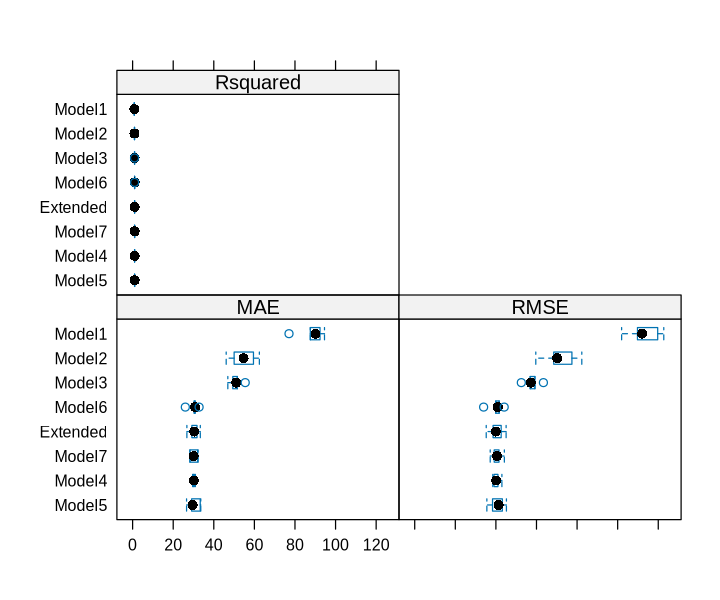

In [19]:
results <- resamples(list(
  Model1 = model_1,
  Model2 = model_2,
  Model3 = model_3,
  Model4 = model_4,
  Model5 = model_5,
  Model6 = model_6,
  Model7 = model_7,
    Extended = extended_model
))

summary(results)
bwplot(results)  # Boxplot of RMSE, R², MAE across 5 folds


# Using Extended Model

In [13]:
# Base Model (again)
base_lm <- lm(Calories_Burned ~ .,
                    data = gym_membership_train)

pred_base_lm <- predict(base_lm, newdata = gym_membership_test)


In [14]:
extended_lm <- lm(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender +
                  Age + Workout_Type, data = gym_membership_train)
pred_extended_lm <- predict(extended_lm, newdata = gym_membership_test)

In [15]:
base_summary <- summary(base_lm)
extended_summary <- summary(extended_lm)

comparison <- data.frame(
  Model = c("Base", "Extended"),
  R_squared = c(base_summary$r.squared, extended_summary$r.squared),
  Adjusted_R_squared = c(base_summary$adj.r.squared, extended_summary$adj.r.squared),
  RMSE = c(
    sqrt(mean((gym_membership_test$Calories_Burned - pred_base_lm)^2)),
    sqrt(mean((gym_membership_test$Calories_Burned - pred_extended_lm)^2))
  )
)
comparison

Model    R_squared Adjusted_R_squared RMSE    
1 Base     0.9791183 0.9785829          38.89517
2 Extended 0.9784654 0.9782414          38.09673

In [18]:
importance <- varImp(extended_lm)
print(importance)

                              Overall
Session_Duration..hours. 160.66180304
Avg_BPM                   57.38933706
GenderMale                29.75298862
Age                       27.02239549
Workout_TypeHIIT           0.10335668
Workout_TypeStrength       0.07661275
Workout_TypeYoga           1.62633140


In [19]:
vif(extended_lm)

GVIF     Df GVIF^(1/(2*Df))
Session_Duration..hours. 1.004402 1  1.002199       
Avg_BPM                  1.004083 1  1.002039       
Gender                   1.002584 1  1.001291       
Age                      1.002297 1  1.001148       
Workout_Type             1.008004 3  1.001330